# KNN

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
df['flower_name'] =df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [7]:
df[45:55]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
45,4.8,3.0,1.4,0.3,0,setosa
46,5.1,3.8,1.6,0.2,0,setosa
47,4.6,3.2,1.4,0.2,0,setosa
48,5.3,3.7,1.5,0.2,0,setosa
49,5.0,3.3,1.4,0.2,0,setosa
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [8]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

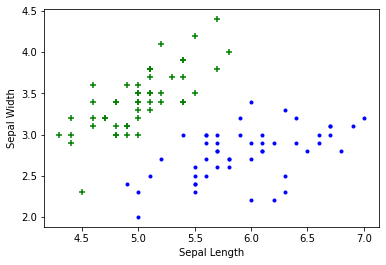

In [10]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color="green",marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color="blue",marker='.')

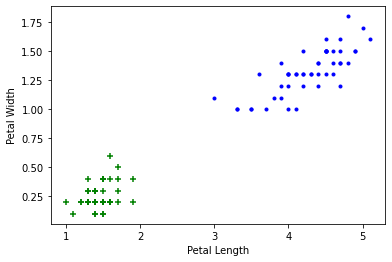

In [11]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color="green",marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color="blue",marker='.')

In [12]:
from sklearn.model_selection import train_test_split
X = df.drop(['target', 'flower_name'], axis = 1)
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)

In [14]:
len(X_train)

120

In [15]:
len(X_test)

30

In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [18]:
knn.score(X_test,y_test)

1.0

In [19]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]])

Text(42.0, 0.5, 'Truth')

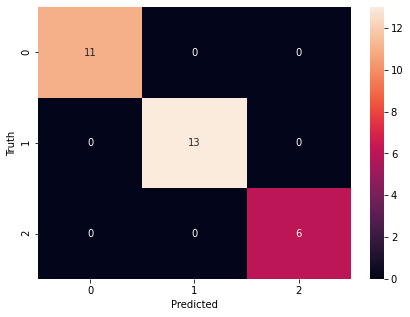

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [21]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Exercise 

From sklearn.datasets load digits dataset and do following

- Classify digits (0 to 9) using KNN classifier. You can use different values for k neighbors and need to figure out a value of K that gives you a maximum score. You can manually try different values of K or use gridsearchcv
- Plot confusion matrix
- Plot classification report

In [22]:
from sklearn.datasets import load_digits
digits = load_digits()

In [24]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(KNeighborsClassifier(), {
    'n_neighbors': list(range(3, 11))
}, cv=5, return_train_score=False)
clf.fit(digits.data, digits.target)
clf.cv_results_

{'mean_fit_time': array([0.0015646 , 0.00035276, 0.0003653 , 0.00034404, 0.00034609,
        0.00034528, 0.00034494, 0.00034437]),
 'std_fit_time': array([2.12823282e-03, 4.08691451e-06, 1.87945231e-05, 3.66265571e-06,
        6.05714588e-06, 5.43970680e-06, 6.03043495e-06, 6.65798556e-06]),
 'mean_score_time': array([0.01898127, 0.01448264, 0.0140419 , 0.01399641, 0.01443739,
        0.0142694 , 0.01448064, 0.01447644]),
 'std_score_time': array([0.0082132 , 0.0003028 , 0.00022519, 0.00041558, 0.00071903,
        0.00049004, 0.00046277, 0.00027518]),
 'param_n_neighbors': masked_array(data=[3, 4, 5, 6, 7, 8, 9, 10],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 3},
  {'n_neighbors': 4},
  {'n_neighbors': 5},
  {'n_neighbors': 6},
  {'n_neighbors': 7},
  {'n_neighbors': 8},
  {'n_neighbors': 9},
  {'n_neighbors': 10}],
 'split0_test_score': array([0.95555556, 0.94722222, 0.947

In [25]:
d = pd.DataFrame(clf.cv_results_)
d

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001565,0.002128,0.018981,0.008213,3,{'n_neighbors': 3},0.955556,0.958333,0.966574,0.986072,0.966574,0.966622,0.010672,1
1,0.000353,0.000004,0.014483,0.000303,4,{'n_neighbors': 4},0.947222,0.958333,0.966574,0.980501,0.966574,0.963841,0.010946,2
2,0.000365,0.000019,0.014042,0.000225,5,{'n_neighbors': 5},0.947222,0.955556,0.966574,0.980501,0.963788,0.962728,0.011169,3
3,0.000344,0.000004,0.013996,0.000416,6,{'n_neighbors': 6},0.944444,0.958333,0.966574,0.974930,0.952646,0.959386,0.010612,5
4,0.000346,0.000006,0.014437,0.000719,7,{'n_neighbors': 7},0.936111,0.961111,0.969359,0.980501,0.952646,0.959946,0.015059,4
5,0.000345,0.000005,0.014269,0.000490,8,{'n_neighbors': 8},0.936111,0.958333,0.969359,0.977716,0.949861,0.958276,0.014580,6
6,0.000345,0.000006,0.014481,0.000463,9,{'n_neighbors': 9},0.930556,0.952778,0.972145,0.977716,0.949861,0.956611,0.016887,7
7,0.000344,0.000007,0.014476,0.000275,10,{'n_neighbors': 10},0.930556,0.947222,0.969359,0.977716,0.949861,0.954943,0.016773,8


In [26]:
clf.best_score_

0.966621788919839

In [27]:
clf.best_params_

{'n_neighbors': 3}

In [30]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(clf, digits.data, digits.target, cv=5)

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(digits.target, y_pred)
cm

array([[178,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 177,   0,   0,   2,   1,   1,   0,   1,   0],
       [  0,   0, 172,   1,   0,   0,   0,   0,   4,   0],
       [  0,   0,   1, 173,   0,   1,   0,   1,   4,   3],
       [  0,   2,   0,   0, 174,   0,   1,   1,   1,   2],
       [  0,   0,   0,   0,   0, 178,   1,   0,   0,   3],
       [  1,   2,   0,   0,   0,   0, 178,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 176,   0,   3],
       [  0,  10,   2,   1,   0,   0,   0,   0, 161,   0],
       [  0,   2,   0,   4,   1,   2,   0,   0,   2, 169]])

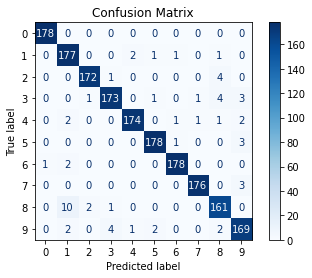

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = digits.target_names)
disp.plot(cmap = plt.cm.Blues, values_format=".0f")
plt.title('Confusion Matrix')
plt.show()

In [39]:
print(classification_report(digits.target, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       178
           1       0.92      0.97      0.94       182
           2       0.98      0.97      0.98       177
           3       0.97      0.95      0.96       183
           4       0.98      0.96      0.97       181
           5       0.98      0.98      0.98       182
           6       0.98      0.98      0.98       181
           7       0.99      0.98      0.99       179
           8       0.93      0.93      0.93       174
           9       0.94      0.94      0.94       180

    accuracy                           0.97      1797
   macro avg       0.97      0.97      0.97      1797
weighted avg       0.97      0.97      0.97      1797

